In [275]:
import numpy as np
from scipy.ndimage import convolve
from matplotlib.pyplot import imshow
from numpy import vectorize

import matplotlib.pyplot as plt

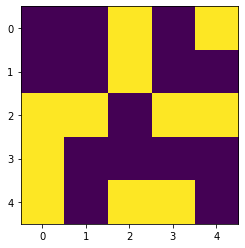

In [307]:
n = 5
grid = np.random.rand((n*n))
grid = np.where(grid < 0.5, 1, -1)

grid = grid.reshape((n,n))

imshow(grid)

In [326]:
def sum_neighbours(grid):
    """Von Neumann neighborhood sum, using a convolution."""
    # kernel is a matrix of the cell von neumann neighborhood
    # Counts every neighbor state except cell's own state
    kernel = [[0,1,0],[1,0,1],[0,1,0]]
    ne = convolve(grid, kernel, mode = 'wrap')
    return ne

def flip(x):
    # Flip the spin
    if x == 1:
        return -1
    return 1

def min_prob(x):
    x = float(x)
    return min(1,x)


def update_grid(grid, T = 1):
    # So we can map over the array
    v_flip = vectorize(flip)
    v_min = vectorize(min_prob)

    # Calculate energy
    energy = -1*sum_neighbours(grid)*grid

    #print(np.unique(energy, return_counts = True))
    #print(energy, '\n' ,grid)

    condition = np.exp(2*energy/T)

    # Random numbers for each cell
    coins = np.random.rand(len(grid),len(grid))

    #choose a subset
    sub_grid = grid[np.random.randint((0,n), size = 50), np.random.randint((0,n), size = 50)]

    print(sub_grid)

    update = np.where(coins < condition, v_flip(grid), grid)

    return update

update_grid(grid)

ValueError: low >= high

In [303]:
# Unfortunately, that doesn't work. But this is the function to calculate magnetism. 
def avg_mag(grid):
    return np.sum(grid, axis = (0,1))/(len(grid)**2)

plot_data = {}

for t in range(1,6):
    final_vals = []
    for trial in range(100):
        for i in range(100):
            updated = update_grid(grid)
        
        final_vals.append(avg_mag(updated))
    plot_data[t] = final_vals   

# Ok, I realize my mistake: I was updating the entire board, instead of random cells, one at a time/batch

(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]))
(array([-4, -2,  0,  2,  4]), array([ 8, 29, 38, 21,  4]

KeyboardInterrupt: 

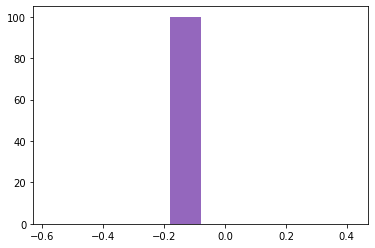

In [276]:
for t in plot_data.keys():
    plt.hist(plot_data[t])